In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import subprocess
import sys

In [189]:
from scipy.ndimage import uniform_filter

In [4]:
from scipy.optimize import bisect

In [3]:
list_t = np.arange(0,41,1)
list_H=np.arange(1,4.5,0.5)
list_H2=np.arange(1,4.,0.5)+0.2
#list_H3=np.array([2.75, 2.8, 2.85, 2.9, 2.95])
#list_H=np.sort(np.concatenate((list_H, list_H2, list_H3)))
list_H=np.sort(np.concatenate((list_H, list_H2)))
mat_m={}
for H in list_H:
    mat_m[H]={}
    for t in list_t:
        mat_m[H][t]=np.loadtxt('critical_rhof/H%s/f_m_t%d.dat'%(str(H),t))

In [150]:
pd.DataFrame(mat_m[H][list_t[t]])

,0,1,2,3,4,5,6,7,8,9,...,80,81,82,83,84,85,86,87,88,89
0,0.957504,0.957504,0.957504,0.957504,0.957504,0.957504,0.957504,0.957504,0.957504,0.957504,...,0.957504,0.957504,0.957504,0.957504,0.957504,0.957504,0.957504,0.957504,0.957504,0.957504
1,0.957504,0.957504,0.957504,0.957504,0.957504,0.957504,0.957504,0.957504,0.957504,0.957504,...,0.957504,0.957504,0.957504,0.957504,0.957504,0.957504,0.957504,0.957504,0.957504,0.957504
2,0.957504,0.957504,0.957504,0.957504,0.957504,0.957504,0.957504,0.957504,0.957504,0.957504,...,0.957504,0.957504,0.957504,0.957504,0.957504,0.957504,0.957504,0.957504,0.957504,0.957504
3,0.957504,0.957504,0.957504,0.957504,0.957504,0.957504,0.957504,0.957504,0.957504,0.957504,...,0.957504,0.957504,0.957504,0.957504,0.957504,0.957504,0.957504,0.957504,0.957504,0.957504
4,0.957504,0.957504,0.957504,0.957504,0.957504,0.957504,0.957504,0.957504,0.957504,0.957504,...,0.957504,0.957504,0.957504,0.957504,0.957504,0.957504,0.957504,0.957504,0.957504,0.957504
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,0.957504,0.957504,0.957504,0.957504,0.957504,0.957504,0.957504,0.957504,0.957504,0.957504,...,0.957504,0.957504,0.957504,0.957504,0.957504,0.957504,0.957504,0.957504,0.957504,0.957504
86,0.957504,0.957504,0.957504,0.957504,0.957504,0.957504,0.957504,0.957504,0.957504,0.957504,...,0.957504,0.957504,0.957504,0.957504,0.957504,0.957504,0.957504,0.957504,0.957504,0.957504
87,0.957504,0.957504,0.957504,0.957504,0.957504,0.957504,0.957504,0.957504,0.957504,0.957504,...,0.957504,0.957504,0.957504,0.957504,0.957504,0.957504,0.957504,0.957504,0.957504,0.957504
88,0.957504,0.957504,0.957504,0.957504,0.957504,0.957504,0.957504,0.957504,0.957504,0.957504,...,0.957504,0.957504,0.957504,0.957504,0.957504,0.957504,0.957504,0.957504,0.957504,0.957504


40


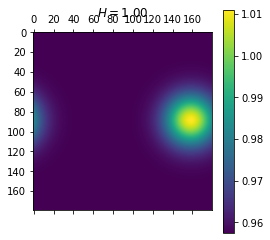

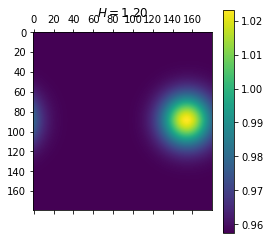

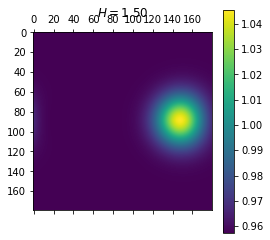

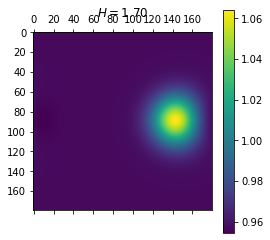

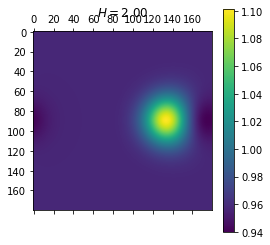

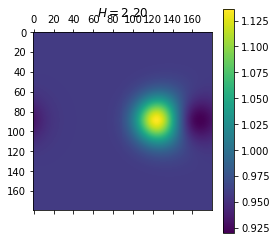

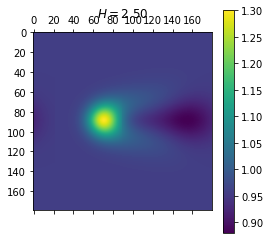

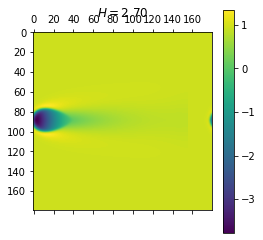

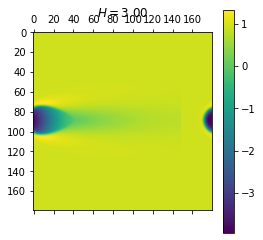

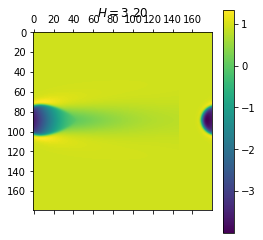

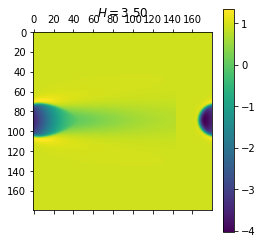

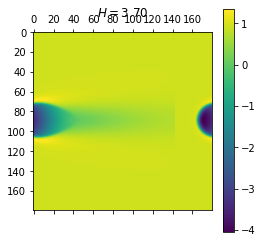

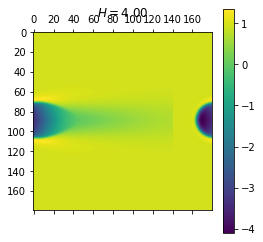

In [155]:
t=-1
print(list_t[t])
for H in list_H:
    
    plt.matshow(mat_m[H][list_t[t]], cmap='viridis')
#plt.matshow(mat_m0.T, cmap='viridis')
    plt.title(r"$H=%.2f$"%H)
#     plt.xlim(0,10)
#     plt.ylim(0,10)

    plt.colorbar()

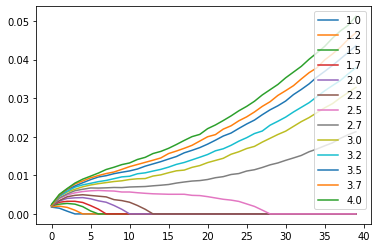

In [156]:
for H in list_H:
    plt.plot([np.mean(mat_m[H][list_t[t]]<0) for t in range(40)], '-', label=H)
    plt.legend()

In [7]:
vec_beta=np.linspace(1.1, 3, 10)
D=1
chi=[]
for beta in vec_beta:
    chi.append(bisect(FluctWins, 1, 20, args=(beta,D, 0.05, 1), xtol=1e-2))

1.1 1.0
1.1 20.0
1.1 10.5
1.1 15.25
1.1 17.625


KeyboardInterrupt: 

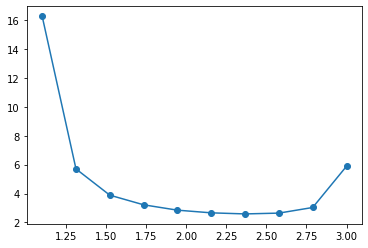

In [95]:
plt.plot(vec_beta, chi, 'o-')

In [8]:
vec_beta=np.linspace(1.1, 3, 20)
D=1
dt=0.01
ds=0.5
r0=3

Hcrit={}
Hcrit[D]={}
for beta in vec_beta:
    Hcrit[D][beta]=bisect(FluctWins, 1, 20, args=(beta,D,dt, ds, r0), xtol=1e-1)

1.1 1.0
1.1 20.0
1.1 10.5
1.1 15.25
1.1 17.625
1.1 16.4375
1.1 17.03125
1.1 16.734375
1.1 16.5859375
1.1 16.66015625
1.2000000000000002 1.0
1.2000000000000002 20.0
1.2000000000000002 10.5
1.2000000000000002 5.75
1.2000000000000002 8.125
1.2000000000000002 9.3125
1.2000000000000002 8.71875
1.2000000000000002 9.015625
1.2000000000000002 8.8671875
1.2000000000000002 8.79296875
1.3 1.0
1.3 20.0
1.3 10.5
1.3 5.75
1.3 8.125
1.3 6.9375
1.3 6.34375
1.3 6.046875
1.3 5.8984375
1.3 5.97265625
1.4000000000000001 1.0
1.4000000000000001 20.0
1.4000000000000001 10.5
1.4000000000000001 5.75
1.4000000000000001 3.375
1.4000000000000001 4.5625
1.4000000000000001 5.15625
1.4000000000000001 4.859375
1.4000000000000001 4.7109375
1.4000000000000001 4.63671875
1.5 1.0
1.5 20.0
1.5 10.5
1.5 5.75
1.5 3.375
1.5 4.5625
1.5 3.96875
1.5 3.671875
1.5 3.8203125
1.5 3.89453125
1.6 1.0
1.6 20.0
1.6 10.5
1.6 5.75
1.6 3.375
1.6 4.5625
1.6 3.96875
1.6 3.671875
1.6 3.5234375
1.6 3.44921875
1.7000000000000002 1.0
1.70000000

In [2]:
Hcrit={1: {1.1: 16.66015625,
  1.2000000000000002: 8.79296875,
  1.3: 5.97265625,
  1.4000000000000001: 4.63671875,
  1.5: 3.89453125,
  1.6: 3.44921875,
  1.7000000000000002: 3.15234375,
  1.8: 3.00390625,
  1.9: 2.70703125,
  2.0: 2.55859375,
  2.1: 2.55859375,
  2.2: 2.41015625,
  2.3: 2.26171875,
  2.4: 2.26171875,
  2.5: 2.11328125,
  2.5999999999999996: 2.11328125,
  2.7: 2.11328125,
  2.8: 2.11328125,
  2.9: 1.96484375,
  3.0: 1.96484375}}

In [14]:
H0_crit_micro={1.7: 150.25607299804688,
 1.8: 117.6015625,
 1.9000000000000001: 113.18649291992188,
 2.0: 106.71875,
 2.1000000000000005: 105.60739135742188,
 2.2: 101.5931396484375,
 2.3000000000000007: 102.0546875,
 2.4000000000000004: 96.97158813476562,
 1.75: 124.5361328125}

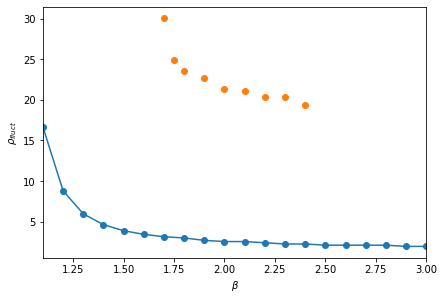

In [18]:
D=1
vec_beta=np.linspace(1.1, 3, 20)

plt.plot(vec_beta, [Hcrit[D][beta] for beta in vec_beta], 'o-')
plt.plot(list(H0_crit_micro), [H0_crit_micro[beta]/5 for beta in H0_crit_micro], 'o')
plt.xlim(1.1, 3.0)

#plt.ylim(0., 20)


plt.xlabel(r'$\beta$')
plt.ylabel(r'$\rho_{fluct}$')
plt.tight_layout(pad=0.1)


In [96]:
def FluctWins(rhof, beta, D, dt, ds, r0):
    #print(r0, rhof, beta, D, dt, ds)
    with open('f_input.dat', 'w') as f:
        f.write('ncpu = 9 nby_box = 3 tgap = 11000 tmax = 100 dt = %f lx = 180 ly = 180 ds = %f rhol = 1 beta = %f v = 1 D = %f gamma = 1 rhof = %f r0 = %f'%(dt, ds, beta, D, rhof, r0))
        
    bashCommand = 'mpirun -np 9 ./solve_PDEs_2d > f_m0.dat'
    popen = subprocess.Popen(bashCommand, stdout=subprocess.PIPE,shell=True)
    popen.wait()
    output = popen.stdout.read()
    return(np.loadtxt('f_m0.dat'))

In [127]:
FluctWins(50, beta, 3.5, dt, ds, 2)

array(-3.397661)

In [141]:
vec_D=np.linspace(0.2, 3.5, 10)
beta=2
dt=0.01
ds=0.5
r0=7
Hcrit_D_r0[r0]={}
for D in vec_D:
    tmp=bisect(FluctWins, 0.4, 50, args=(beta,D,dt, ds,r0), xtol=1e-2)
    print(D, tmp)
    Hcrit_D_r0[r0][D]=tmp

0.2 0.45449218750000003
0.5666666666666667 0.5392578125
0.9333333333333333 0.6603515625
1.2999999999999998 0.8662109375000001
1.6666666666666665 1.1568359375
2.033333333333333 1.5201171875000001
2.4 1.9560546875000002
2.7666666666666666 2.4646484375
3.1333333333333333 3.0337890625
3.5 3.6634765624999996


In [103]:
Hcrit_D_r0[3]=Hcrit_D

In [142]:
Hcrit_D_r0

{3: {0.2: 0.604736328125,
  0.3736842105263158: 0.833251953125,
  0.5473684210526315: 1.195068359375,
  0.7210526315789474: 1.652099609375,
  0.894736842105263: 2.223388671875,
  1.068421052631579: 2.870849609375,
  1.2421052631578946: 3.613525390625,
  1.4157894736842105: 4.432373046875,
  1.5894736842105261: 5.327392578125,
  1.7631578947368418: 6.298583984375,
  1.9368421052631577: 7.345947265625,
  2.110526315789474: 8.488525390625,
  2.2842105263157895: 9.688232421875,
  2.457894736842105: 10.945068359375,
  2.6315789473684212: 12.297119140625,
  2.805263157894737: 13.706298828125,
  2.9789473684210526: 15.191650390625,
  3.1526315789473682: 16.734130859375,
  3.326315789473684: 18.352783203125},
 5: {0.2: 0.4861328125,
  0.5666666666666667: 0.6583984375,
  0.9333333333333333: 0.9837890625,
  1.2999999999999998: 1.4623046875,
  1.6666666666666665: 2.0939453125000003,
  2.033333333333333: 2.8787109375,
  2.4: 3.7783203125000004,
  2.7666666666666666: 4.8119140625,
  3.1333333333333

In [81]:
Hcrit_D

{0.2: 0.604736328125,
 0.3736842105263158: 0.833251953125,
 0.5473684210526315: 1.195068359375,
 0.7210526315789474: 1.652099609375,
 0.894736842105263: 2.223388671875,
 1.068421052631579: 2.870849609375,
 1.2421052631578946: 3.613525390625,
 1.4157894736842105: 4.432373046875,
 1.5894736842105261: 5.327392578125,
 1.7631578947368418: 6.298583984375,
 1.9368421052631577: 7.345947265625,
 2.110526315789474: 8.488525390625,
 2.2842105263157895: 9.688232421875,
 2.457894736842105: 10.945068359375,
 2.6315789473684212: 12.297119140625,
 2.805263157894737: 13.706298828125,
 2.9789473684210526: 15.191650390625,
 3.1526315789473682: 16.734130859375,
 3.326315789473684: 18.352783203125}

Text(0, 0.5, '$\\rho_{fluct}$')

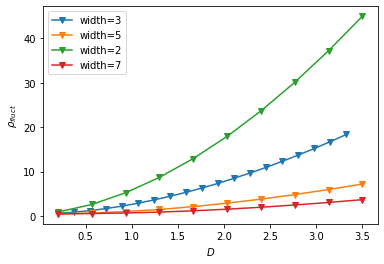

In [147]:
#plt.figure(figsize=(5,4))
# abs_D=np.array(list(Hcrit_D))
# r0=3
# plt.plot(abs_D, [np.pi*r0*r0*Hcrit_D[D] for D in abs_D], 'o-')


for r0 in list(Hcrit_D_r0):
    abs_D=np.array(list(Hcrit_D_r0[r0]))
    plt.plot(abs_D, np.array([Hcrit_D_r0[r0][D] for D in abs_D]), 'v-', label=r'width=%d'%r0)

#plt.xlim((0.5,3))
plt.legend()

plt.xlabel(r'$D$')
plt.ylabel(r'$\rho_{fluct}$')


Text(0, 0.5, '$N_f$')

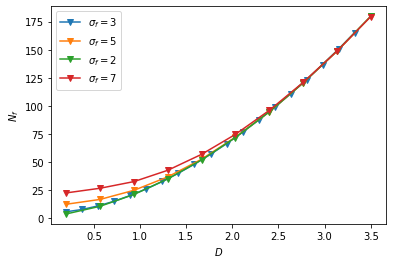

In [158]:
#plt.figure(figsize=(5,4))
# abs_D=np.array(list(Hcrit_D))
# r0=3
# plt.plot(abs_D, [np.pi*r0*r0*Hcrit_D[D] for D in abs_D], 'o-')


for r0 in list(Hcrit_D_r0):
    abs_D=np.array(list(Hcrit_D_r0[r0]))
    plt.plot(abs_D, np.array([Hcrit_D_r0[r0][D] for D in abs_D])*(r0*r0), 'v-', label=r'$\sigma_f=%d$'%r0)

#plt.xlim((0.5,3))
plt.legend()

plt.xlabel(r'$D$')
plt.ylabel(r'$N_f$')


In [171]:
beta=2
dt=0.01
ds=0.5
r0=7
D=0.5
rhof=0.6

with open('f_input.dat', 'w') as f:
        f.write('ncpu = 9 nby_box = 3 tgap = 1 tmax = 100 dt = %f lx = 180 ly = 180 ds = %f rhol = 1 beta = %f v = 1 D = %f gamma = 1 rhof = %f r0 = %f'%(dt, ds, beta, D, rhof, r0))

bashCommand = 'mpirun -np 9 ./solve_PDEs_2d > f_m0.dat'
popen = subprocess.Popen(bashCommand, stdout=subprocess.PIPE,shell=True)
popen.wait()
output = popen.stdout.read()

In [31]:
list_t=[100, 200, 300, 400, 500, 600, 800]

In [32]:
mat_m={}
for t in list_t:
    mat_m[t]=np.loadtxt('f_m_t%d.dat'%(t))

OSError: f_m_t800.dat not found.

In [ ]:
for t in list_t:

    plt.matshow(mat_m[t], cmap='viridis')

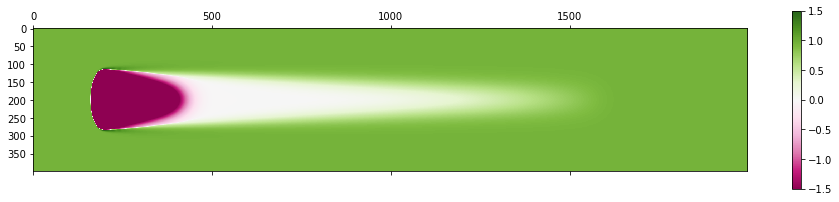

In [25]:
v0=1.5

plt.matshow(mat_m[600], cmap='PiYG', vmin=-v0, vmax=v0)
plt.colorbar()

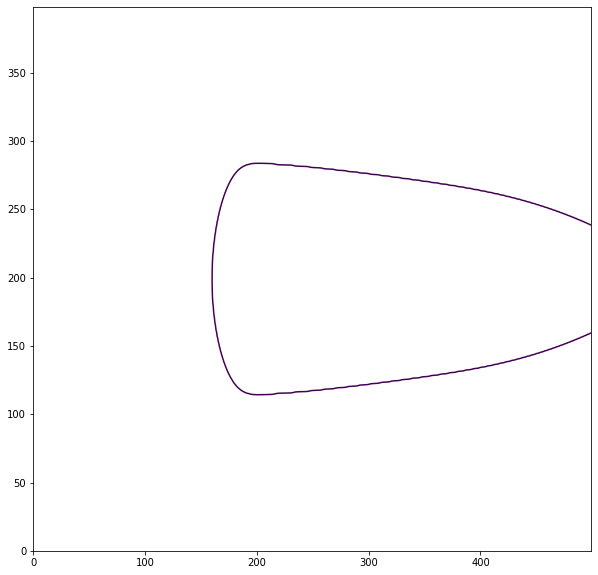

In [29]:
plt.figure(figsize=(10,10))
xmin=0
xmax=500
xlist = np.arange(xmin, xmax)
ylist = np.arange(0, 399)
X, Y = np.meshgrid(xlist, ylist)
Z = mat_m[600][:,xmin:xmax]
cp = plt.contour(X, Y, Z, levels=[0])

In [30]:
np.

array([[0.957504, 0.957504, 0.957504, ..., 0.957504, 0.957504, 0.957504],
       [0.957504, 0.957504, 0.957504, ..., 0.957504, 0.957504, 0.957504],
       [0.957504, 0.957504, 0.957504, ..., 0.957504, 0.957504, 0.957504],
       ...,
       [0.957504, 0.957504, 0.957504, ..., 0.957504, 0.957504, 0.957504],
       [0.957504, 0.957504, 0.957504, ..., 0.957504, 0.957504, 0.957504],
       [0.957504, 0.957504, 0.957504, ..., 0.957504, 0.957504, 0.957504]])

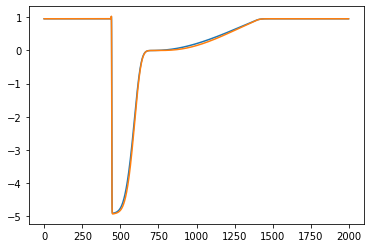

In [21]:
plt.plot(mat_m[400][210,:])
plt.plot(mat_m[400][200,:])

In [11]:
mat_rho={}
for t in list_t:
    mat_rho[t]=np.loadtxt('f_rho_t%d.dat'%(t))

In [12]:
[np.sum(mat_rho[t]) for t in list_t]

[797428.9433060002,
 797428.943106,
 797428.9431840001,
 797428.942595,
 797428.9429059998,
 797428.9424819999]

# Fluctuation width

In [22]:
def FluctWins(r0, rhof, beta, D, dt, ds):
    print(r0, rhof, beta, D, dt, ds)
    with open('f_input.dat', 'w') as f:
        f.write('ncpu = 9 nby_box = 3 tgap = 11000 tmax = 100 dt = %f lx = 180 ly = 180 ds = %f rhol = 1 beta = %f v = 1 D = %f gamma = 1 rhof = %f r0 = %f'%(dt, ds, beta, D, rhof, r0))
        
    bashCommand = 'mpirun -np 9 ./solve_PDEs_2d > f_m0.dat'
    popen = subprocess.Popen(bashCommand, stdout=subprocess.PIPE,shell=True)
    popen.wait()
    output = popen.stdout.read()
    return(np.loadtxt('f_m0.dat'))

In [48]:
vec_D=np.linspace(0.5, 3, 10)
beta=2
dt=0.01
ds=0.5
rhof=1.2

Sigcrit_D={}
for D in vec_D:
    Sigcrit_D[D]=bisect(FluctWins, 1, 20, args=(rhof, beta,D,dt, ds), xtol=1e-2)

1.0 1.2 2 0.5 0.01 0.5
20.0 1.2 2 0.5 0.01 0.5
10.5 1.2 2 0.5 0.01 0.5
5.75 1.2 2 0.5 0.01 0.5
3.375 1.2 2 0.5 0.01 0.5
2.1875 1.2 2 0.5 0.01 0.5
2.78125 1.2 2 0.5 0.01 0.5
3.078125 1.2 2 0.5 0.01 0.5
2.9296875 1.2 2 0.5 0.01 0.5
2.85546875 1.2 2 0.5 0.01 0.5
2.818359375 1.2 2 0.5 0.01 0.5
2.7998046875 1.2 2 0.5 0.01 0.5
2.80908203125 1.2 2 0.5 0.01 0.5
1.0 1.2 2 0.7777777777777778 0.01 0.5
20.0 1.2 2 0.7777777777777778 0.01 0.5
10.5 1.2 2 0.7777777777777778 0.01 0.5
5.75 1.2 2 0.7777777777777778 0.01 0.5
3.375 1.2 2 0.7777777777777778 0.01 0.5
4.5625 1.2 2 0.7777777777777778 0.01 0.5
3.96875 1.2 2 0.7777777777777778 0.01 0.5
3.671875 1.2 2 0.7777777777777778 0.01 0.5
3.8203125 1.2 2 0.7777777777777778 0.01 0.5
3.89453125 1.2 2 0.7777777777777778 0.01 0.5
3.857421875 1.2 2 0.7777777777777778 0.01 0.5
3.8388671875 1.2 2 0.7777777777777778 0.01 0.5
3.82958984375 1.2 2 0.7777777777777778 0.01 0.5
1.0 1.2 2 1.0555555555555556 0.01 0.5
20.0 1.2 2 1.0555555555555556 0.01 0.5
10.5 1.2 2 1.055

In [58]:
D=3.3
Sigcrit_D[D]=bisect(FluctWins, 10, 15, args=(rhof, beta,D,dt, ds), xtol=1e-2)

10.0 1.2 2 3.3 0.01 0.5
15.0 1.2 2 3.3 0.01 0.5
12.5 1.2 2 3.3 0.01 0.5
11.25 1.2 2 3.3 0.01 0.5
11.875 1.2 2 3.3 0.01 0.5
12.1875 1.2 2 3.3 0.01 0.5
12.03125 1.2 2 3.3 0.01 0.5
11.953125 1.2 2 3.3 0.01 0.5
11.9921875 1.2 2 3.3 0.01 0.5
12.01171875 1.2 2 3.3 0.01 0.5
12.001953125 1.2 2 3.3 0.01 0.5


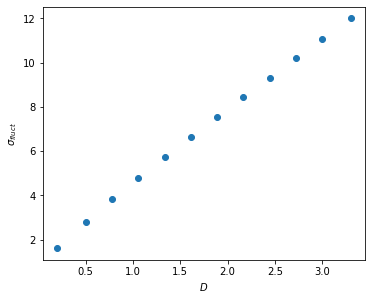

In [63]:
plt.figure(figsize=(5,4))
plt.plot(list(Sigcrit_D),[Sigcrit_D[D] for D in Sigcrit_D], 'o')

#plt.xlim((0.5,3))


plt.xlabel(r'$D$')
plt.ylabel(r'$\sigma_{fluct}$')

plt.tight_layout(pad=0.1)

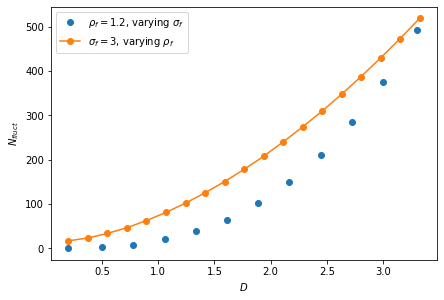

In [95]:
sig=np.array(list(Sigcrit_D))
rhof=1.2
plt.plot(sig,rhof*sig*sig*np.pi*np.array([Sigcrit_D[D] for D in Sigcrit_D]), 'o', label=r'$\rho_f = 1.2$, varying $\sigma_f$')

abs_D=np.array(list(Hcrit_D))
r0=3
plt.plot(abs_D, [np.pi*r0*r0*Hcrit_D[D] for D in abs_D], 'o-', label=r'$\sigma_f = 3$, varying $\rho_f$')

plt.legend()
#plt.xlim((0.5,3))


plt.xlabel(r'$D$')
plt.ylabel(r'$N_{fluct}$')

plt.tight_layout(pad=0.1)

In [47]:
beta=2
dt=0.01
ds=0.5
rhof=1.2
r0=5
FluctWins(r0, rhof, beta, D, dt, ds)

5 1.2 2 0.5 0.01 0.5


array(-5.18357)

# Droplet 2D PDE

In [11]:
list_t=np.round(np.arange(0, 2300, 50))

In [82]:
mat={}
for t in list_t:
    mat[t]=pd.read_csv('/home/invites/benvegnen/AI2D/data_PDE_2d_alex/%09d.snap'%t, sep='\t', skiprows=[1])

In [83]:
mat[2250]

,#x,y,rho,m
0,0.00,0.000000,1.0,-0.957504
1,0.00,0.666667,1.0,-0.957504
2,0.00,1.333330,1.0,-0.957504
3,0.00,2.000000,1.0,-0.957504
4,0.00,2.666670,1.0,-0.957504
...,...,...,...,...
10799995,7999.33,596.667000,1.0,-0.957504
10799996,7999.33,597.333000,1.0,-0.957504
10799997,7999.33,598.000000,1.0,-0.957504
10799998,7999.33,598.667000,1.0,-0.957504


In [93]:
w=[]
for t in list_t:
    mat1=mat[t].m.values.reshape((12000,-1)).T 
    w.append((2/3)*np.max(np.sum(mat1>0, axis=0)))

In [106]:
w_micro=[]
for t in np.arange(5):
    mat1=-f_m.values[500*t:500*(t+1),:][:,::-1]
    w_micro.append(np.max(np.sum(mat1>0, axis=0)))

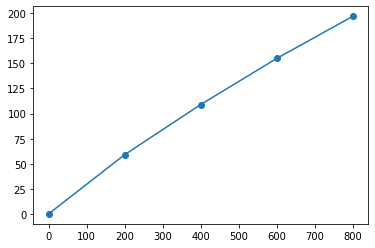

In [110]:
plt.plot(200*np.arange(5), w_micro, 'o-')

# a, b = np.polyfit(list_t[20:], w[20:], deg=1)
# print(a, b)

# plt.plot(list_t, a*list_t+b, 'k--')

0.2316490028490028 54.442165242165146


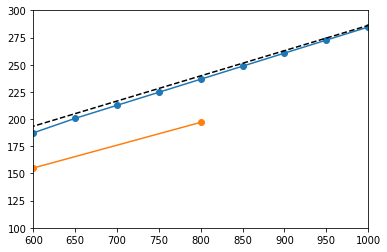

In [114]:
plt.plot(list_t, w, 'o-')
plt.plot(200*np.arange(5), w_micro, 'o-')
plt.xlim(600,1000)
plt.ylim(100,300)

a, b = np.polyfit(list_t[20:], w[20:], deg=1)
print(a, b)

plt.plot(list_t, a*list_t+b, 'k--')

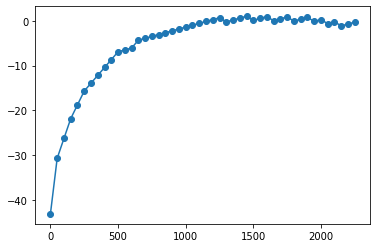

In [105]:
plt.plot(list_t, w-(a*list_t+b), 'o-')

In [100]:
np.mean(np.diff(w[5:])/50)

0.23933333333333326

In [84]:
mat1=mat[t].m.values.reshape((12000,-1)).T 

In [86]:
np.sum(mat1, axis=0).shape

(12000,)

In [24]:
np.sum(mat[0]['#x']==0)

900

In [115]:
mat1=mat[650].m.values.reshape((12000,-1)).T

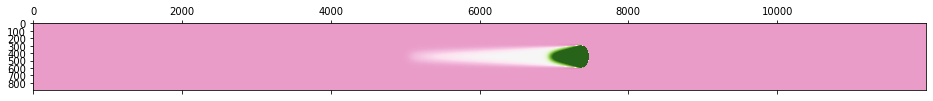

In [116]:
v0=2
plt.matshow(mat1, cmap='PiYG', vmin=-v0, vmax=v0)

#plt.xlim(5000,7000)

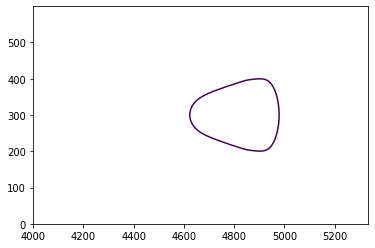

In [125]:
xmin=6000
xmax=8000
xlist = np.arange(xmin, xmax)*(2./3)
ylist = np.arange(0, 900)*(2./3)
X, Y = np.meshgrid(xlist, ylist)
Z = mat1[:,xmin:xmax]
cp = plt.contour(X, Y, Z, levels=[1])

In [40]:
lx=2100

In [145]:
f_m=pd.read_csv('/users/invites/benvegnen/Thesis/AI2D/AI2D_on_lattice/destab_liqp_blob_films/data_prof_article/i0/f_profiles_m.dat', sep=' ', names=np.arange(lx), index_col=False)
f_rho=pd.read_csv('/users/invites/benvegnen/Thesis/AI2D/AI2D_on_lattice/destab_liqp_blob_films/data_prof_article/i0/f_profiles_rho.dat', sep=' ', names=np.arange(lx), index_col=False)


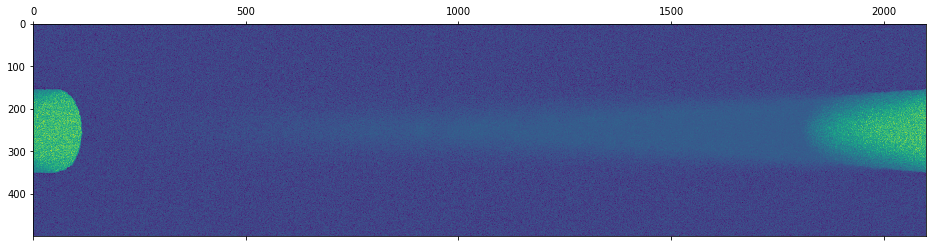

In [117]:
t=4
plt.matshow(-f_m.values[500*t:500*(t+1),:][:,::-1])

In [237]:
mat_micro_m=np.roll(-f_m.values[-500:,:][:,::-1],-500)

(0, 2100)

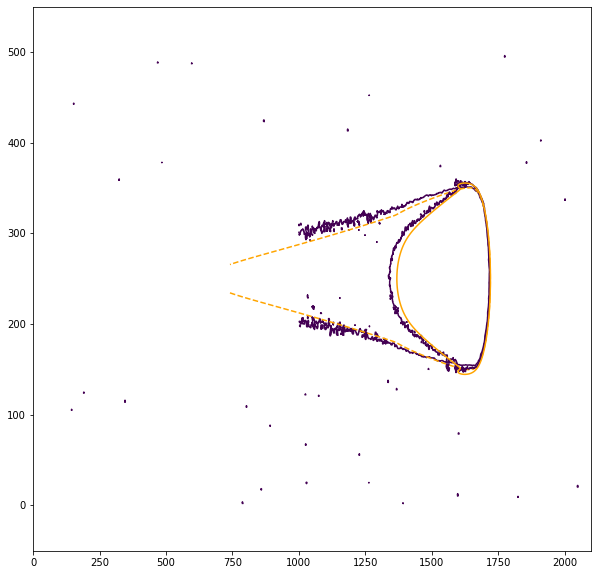

In [247]:
plt.figure(figsize=(10,10))
xmin=1000
xmax=2100
xlist = np.arange(xmin, xmax)
ylist = np.arange(0, 500)
X, Y = np.meshgrid(xlist, ylist)

avg_prof=uniform_filter(mat_micro_m, size=4, mode='constant')

Z = avg_prof[:,xmin:xmax]

cp = plt.contour(X, Y, Z, levels=[-1])

xmin=6000
xmax=8000
xlist = np.arange(xmin, xmax)*(2./3)
ylist = np.arange(0, 900)*(2./3)
X, Y = np.meshgrid(xlist, ylist)
Z = mat1[:,xmin:xmax]
cp = plt.contour(X-3259, Y-50, Z, levels=[-1e-1], colors='orange')


#DENS

xmin=0
xmax=2100
xlist = np.arange(xmin, xmax)
ylist = np.arange(0, 500)
X, Y = np.meshgrid(xlist, ylist)

avg_prof=uniform_filter(mat_micro_rho, size=4, mode='constant')

Z = avg_prof[:,xmin:xmax]
cp = plt.contour(X, Y, Z, levels=[12])

xmin=0
xmax=8000
xlist = np.arange(xmin, xmax)*(2./3)
ylist = np.arange(0, 900)*(2./3)
X, Y = np.meshgrid(xlist, ylist)
Z = mat_pde_rho[:,xmin:xmax]
cp = plt.contour(X-3260, Y-50, Z, levels=[1.2], colors='orange')

plt.xlim(0,2100)

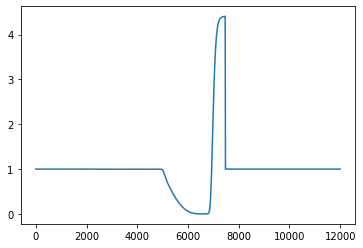

In [240]:
plt.plot(mat_pde_rho[450,:])

In [177]:
mat_micro_rho=np.roll(f_rho.values[-500:,:][:,::-1],-500)

In [192]:
mat_micro_m=np.roll(f_m.values[-500:,:][:,::-1],-500)

In [178]:
mat_pde_rho=mat[650].rho.values.reshape((12000,-1)).T

(0, 2100)

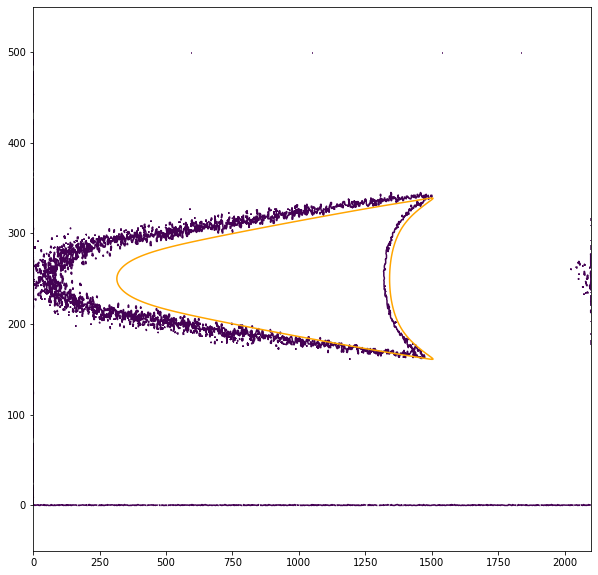

In [190]:
plt.figure(figsize=(10,10))
xmin=0
xmax=2100
xlist = np.arange(xmin, xmax)
ylist = np.arange(0, 500)
X, Y = np.meshgrid(xlist, ylist)

avg_prof=uniform_filter(mat_micro_rho, size=4, mode='constant')

Z = avg_prof[:,xmin:xmax]
cp = plt.contour(X, Y, Z, levels=[5])

xmin=0
xmax=8000
xlist = np.arange(xmin, xmax)*(2./3)
ylist = np.arange(0, 900)*(2./3)
X, Y = np.meshgrid(xlist, ylist)
Z = mat_pde_rho[:,xmin:xmax]
cp = plt.contour(X-3260, Y-50, Z, levels=[0.5], colors='orange')

plt.xlim(0,2100)

(0, 2100)

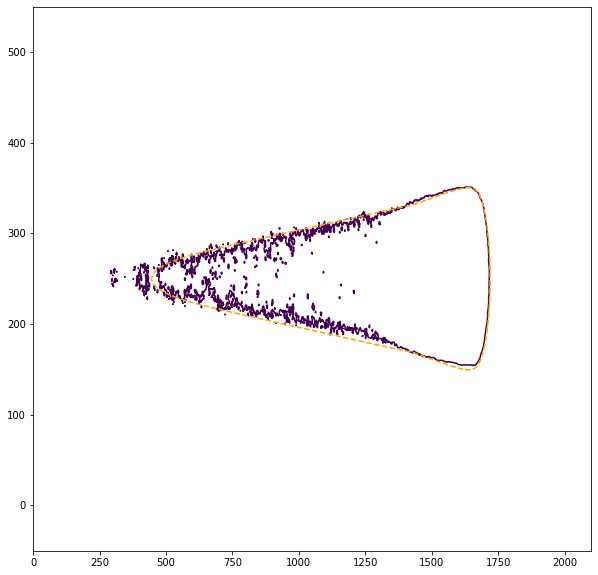

In [205]:
plt.figure(figsize=(10,10))
xmin=0
xmax=2100
xlist = np.arange(xmin, xmax)
ylist = np.arange(0, 500)
X, Y = np.meshgrid(xlist, ylist)

avg_prof=uniform_filter(mat_micro_m, size=4, mode='constant')

Z = avg_prof[:,xmin:xmax]
cp = plt.contour(X, Y, Z, levels=[0])

xmin=0
xmax=8000
xlist = np.arange(xmin, xmax)*(2./3)
ylist = np.arange(0, 900)*(2./3)
X, Y = np.meshgrid(xlist, ylist)
Z = mat1[:,xmin:xmax]
cp = plt.contour(X-3260, Y-50, Z, levels=[-0.3], colors='orange')

plt.xlim(0,2100)

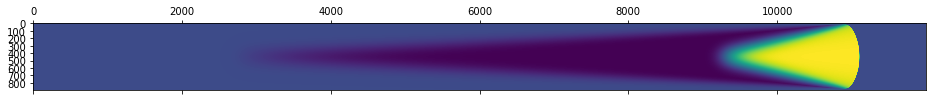

In [186]:
plt.matshow(mat_pde_rho_tf)


In [227]:
np.argmax(mat1[450,:])

7458

(4000, 8000)

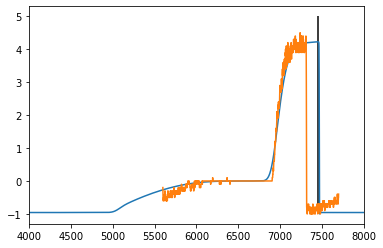

In [228]:
plt.plot(mat1[450,:])

xshift=5600
plt.plot(np.arange(xshift, xshift+avg_prof[250,:].shape[0]), -avg_prof[250,:]/10)

plt.vlines(7458, -1,5)
plt.xlim(4000,8000)

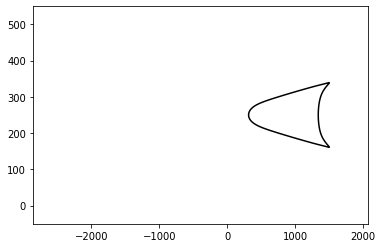

In [157]:

xmin=600
xmax=8000
xlist = np.arange(xmin, xmax)*(2./3)
ylist = np.arange(0, 900)*(2./3)
X, Y = np.meshgrid(xlist, ylist)
Z = mat_pde_rho[:,xmin:xmax]
cp = plt.contour(X-3259, Y-50, Z, levels=[0.5], colors='black')